# Homework Two - Classification
## Objective

As a result of completing this exercise you should be able to:

- Understand the concept of Classification (binary and multi-class classifier)
- Understand the concept of K Nearest Neighbors (KNN)
- Understand the concept of Decision Tree
- Understand the concept of Support Vector Machine (SVM)
- Process external and real-world data properly
- Build the classification models using above learning algorithms using `scikit-learn`
- Do model evaluation using classification reports using `scikit-learn`

## Instructions

### Section
This homework includes three coding sections (one section for one learning algorithm) and one disucssion sectioni. You will build classification models using different approaches (i.e., KNN, decision tree, and SVM) with sickit-learn module in Python . 

### Submission
The assignment should be submitted on Canvas. You will submit a zip file containing a single Jupyter Notebook(ipynb file) and two subfolders ("images" and "datasets"). In the "datasets" folder, please include the data set used for this assignment. In the "images" folder, please include any images used or created for this assignment.  

- Name you zip file as hw2_$\lt$your JMU eid$\gt$.zip. For example, Dr. Yang's eid is yang4cx, then the submission would be hw2_yang4cx.zip
- Please make sure your zip file is in a valid format and can be unzip before your sumbit it

### Some useful webpage from Scikit-Learn library
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html
- https://scikit-learn.org/stable/modules/neighbors.html
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/svm.html

## Dataset

In this assignment, we will apply diverse classficiation models to an external dataset to classify glass. Imagine that you are working for CSI. Your colleagues hand you some samples of glass from some crime scene and you are asked to figure out what type of glass are they.

Please build predictive models that answers the question: "Which type of glass does a sample belong to" using the glass data (i.e., refractive index, sodium, ..., and iron) and the machine learning algorithms we have learned.

<a id="datasource"></a>

### Data source:
The data are from Kaggle and more details as well as data description can be found at https://www.kaggle.com/uciml/glass. (The dataset is the "glass.csv" on the website)

## Section I: KNN

### Preprocessing

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [27]:
glass = pd.read_csv("./glass.csv")
print(glass.shape)

# provide information on first five samples
glass.head()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
# check the keys in builit-in data
list(glass.keys())

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [29]:
# information on data features
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [30]:
# assign features and targets to variables
X = pd.DataFrame(glass.drop(["Type"], axis = 1),
            columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
y = glass.Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 40, stratify = y)


#checking data set
print('Feature dimension:', X.shape)
print('Class labels:', np.unique(y))

Feature dimension: (214, 9)
Class labels: [1 2 3 5 6 7]


In [31]:
# how many samples in training data
print(X_train.shape)

(171, 9)


In [32]:
# how many samples in test data
print(X_test.shape)

(43, 9)


In [6]:
# double check values in the variables
print(X)
print(y)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]
0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [7]:
# load necessary package and methods
from sklearn.preprocessing import StandardScaler

# standardized the features in both the training and test set 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train)
print(y_train)

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
203  1.51658  14.80  0.00  1.99  73.11  0.00   8.28  1.71  0.00
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10
115  1.51846  13.41  3.89  1.33  72.38  0.51   8.28  0.00  0.00
151  1.52127  14.32  3.90  0.83  71.50  0.00   9.49  0.00  0.00
192  1.51623  14.20  0.00  2.79  73.46  0.04   9.04  0.40  0.09
..       ...    ...   ...   ...    ...   ...    ...   ...   ...
161  1.51934  13.64  3.54  0.75  72.65  0.16   8.89  0.15  0.24
62   1.52172  13.51  3.86  0.88  71.79  0.23   9.54  0.00  0.11
30   1.51768  12.65  3.56  1.30  73.08  0.61   8.69  0.00  0.14
53   1.51837  13.14  2.84  1.28  72.85  0.55   9.07  0.00  0.00
166  1.52151  11.03  1.71  1.56  73.44  0.58  11.62  0.00  0.00

[171 rows x 9 columns]
203    7
47     1
115    2
151    3
192    7
      ..
161    3
62     1
30     1
53     1
166    5
Name: Type, Length: 171, dtype: int64


### Learning - Training a KNN model

In [47]:
# build your KNN model
# load necessary package and methods
from sklearn.neighbors import KNeighborsClassifier

# set the classifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

# fit the classifier from training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Prediction

Predict the label or class for a new sample with features as

RI | Na | Mg | Al | Si | K | Ca | Ba | Fe
--- | --- | --- | --- | --- | --- | --- | --- | --- 
1.6010| 12.51 | 1.67 | 2.15 | 72.19 | 0.79 | 9.3 | 0.28 | 0.54 

In [48]:
# standardize the features
test_wstd = sc.transform([[1.6010, 12.51, 1.67, 2.15, 72.19, 0.79, 9.3, 0.28, 0.54]])

# prediction
knn.predict(test_wstd)

array([5], dtype=int64)

Predict the label or class for all the samples in the test set

In [49]:
# predict the label for all samples in test set
knn.predict(X_test)

array([1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 6, 2, 1, 1,
       2, 7, 1, 1, 7, 2, 1, 2, 1, 2, 1, 7, 1, 7, 2, 7, 7, 1, 1, 2, 1],
      dtype=int64)

### Classification Report

In [50]:
# Classification report for KNN
# define y_pred
y_pred = knn.predict(X_test)

# print
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.79      0.59        14
           2       0.62      0.53      0.57        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.58        43
   macro avg       0.49      0.44      0.44        43
weighted avg       0.53      0.58      0.54        43



## Section II: Decision Tree

### Preprocessing

In [12]:
# double check the loaded data
# dimensions
print("Dimension:", glass.shape)

# data information
print("Information:")
print(glass.info())

# data summary
print("Summary:\n", glass.describe())

Dimension: (214, 10)
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
Summary:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.7300

### Learning - Training a Decision Tree model

In [13]:
# load necessary package and methods, if you havne't
from sklearn.tree import DecisionTreeClassifier

# build a decision tree model
# set the classifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)

# fit the classifier from training set
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Prediction

Predict the label or class for a new sample with features as

RI | Na | Mg | Al | Si | K | Ca | Ba | Fe
--- | --- | --- | --- | --- | --- | --- | --- | --- 
1.6010| 12.51 | 1.67 | 2.15 | 72.19 | 0.79 | 9.3 | 0.28 | 0.54 

In [14]:
# predict the label or class for sample with given features
tree_model.predict([[1.6010, 12.51, 1.67, 2.15, 72.19, 0.79, 9.3, 0.28, 0.54]])

array([5], dtype=int64)

Predict the label or class for all the samples in the test set

In [15]:
# predict the label for all samples in test set
tree_model.predict(X_test)

array([1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 1, 1, 2, 1, 2, 2, 2, 3, 1,
       2, 7, 3, 1, 7, 2, 2, 2, 2, 5, 7, 7, 1, 7, 2, 5, 7, 1, 5, 3, 2],
      dtype=int64)

### Classification Report

In [16]:
# Classification report for DT
# define y_pred
y_pred = tree_model.predict(X_test)

# print
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.57      0.57        14
           2       0.53      0.53      0.53        15
           3       0.20      0.33      0.25         3
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.56        43
   macro avg       0.47      0.49      0.48        43
weighted avg       0.55      0.56      0.55        43



### Present the Decision Tree
Please disply the decision tree structure on the screen and save it to either a pdf, jpeg, or png file.

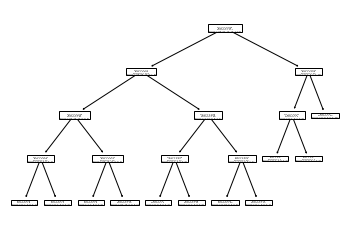

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree


# plot the tree
tree.plot_tree(tree_model)
# save the plot into a pdf file
plt.savefig('images/tree_model_iris.pdf')
# show the plot on the screen
plt.show()

## Section III: SVM

### Preprocessing

In [68]:
# define function to visualize decision boundaries

from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [69]:
# double check the labels in samples
print('Class labels:', np.unique(y))

Class labels: [1 2 3 5 6 7]


### Learning - Training a SVM model

In [70]:
# load necessary package and methods, if you havne't
from sklearn.svm import SVC

# build a SVM Classifier model
# set the classifier
svm_clf = SVC(kernel="linear", C=float("inf"), max_iter= 5000, decision_function_shape='ovo')

# fit the classifier from training set
svm_clf.fit(X_train_std, y_train)


SVC(C=inf, decision_function_shape='ovo', kernel='linear', max_iter=5000)

### Prediction

Predict the label or class for a new sample with features as

RI | Na | Mg | Al | Si | K | Ca | Ba | Fe
--- | --- | --- | --- | --- | --- | --- | --- | --- 
1.6010| 12.51 | 1.67 | 2.15 | 72.19 | 0.79 | 9.3 | 0.28 | 0.54 

In [71]:
# get prediction for class with given samples
X_new = np.array([[1.6010, 12.51, 1.67, 2.15, 72.19, 0.79, 9.3, 0.28, 0.54]])
X_new_std = sc.transform(X_new)
y_hat = svm_clf.predict(X_new_std)
print(y_hat)

[7]


Predict the label or class for all the samples in the test set

In [72]:
# get prediction for all the samples in the test set
y_hats = svm_clf.predict(X_test_std)
print(y_hats)

[2 2 2 1 6 1 1 1 3 1 3 3 1 1 1 3 2 3 6 1 3 2 1 7 3 1 7 2 1 2 6 1 3 7 1 7 1
 5 7 1 7 1 1]


### Classification Report

In [73]:
# genereate and print the classification report
target_names = ['class 0: buildingwindowsfloatprocessed', 'class 1: buildingwindowsnonfloatprocessed', 'class 2: vehiclewindowsfloatprocessed', 'class 4: containers', 'class 5: tableware', 'class 6: headlamps']

# genereate and print the classification report
print(classification_report(y_test, y_hats, target_names=target_names))

                                           precision    recall  f1-score   support

   class 0: buildingwindowsfloatprocessed       0.44      0.57      0.50        14
class 1: buildingwindowsnonfloatprocessed       0.29      0.13      0.18        15
    class 2: vehiclewindowsfloatprocessed       0.12      0.33      0.18         3
                      class 4: containers       1.00      0.33      0.50         3
                       class 5: tableware       0.67      1.00      0.80         2
                       class 6: headlamps       1.00      1.00      1.00         6

                                 accuracy                           0.47        43
                                macro avg       0.59      0.56      0.53        43
                             weighted avg       0.49      0.47      0.45        43



## Section IV: Discussion

### Question 1: Describe traing samples
- How many observations are there in the dataset? 
- How many features does each observation have? 
- What/Which columns did you include in your features? Why and Why not?
- What/Which column did you use for the label or target value?
- What do those values of labels mean? (You may want to check the [data source](#datasource))
- How many samples are there in your training set? How many in the test set?

Please answer those questions in the cell below.

Answer: There are 214 samples in the dataset. Each observation has 10 features. We included all features other than Type. This is because Type is what we are trying to identify for the observations. The Type column was used as the label or target value, as this is what we are attempting to find. RI is the observations refractive index. Na through Fe refers to the elements weight percent in corresponding oxide for each observation (Kaggle). There are 171 samples in the training set and 43 samples in the test set.

### Question 2: Explore insights from the model - KNN
- How many neighbhors did you consider in the model you built?
- Why did you select the number? Have you changed the numbers? 
- Which distance function did you use in the model you built?
- Why did you select that distance function? Have you tried other distance function?
- Did any changes in the parameters or arguments (when you set the classifer) make your preidction or classificaton report different?
- How did you or can you fine tune the KNN model?

Please answer those questions in the cell below.

Answer: We considered 5 neighbors in the model we built [8]. This number was used in the example KNN completed in lab. If we increased K, the learning model would take more time to run, but have less variance and smoother deicison boundaries. We used the minkowski distance function in the model we built. The minkowski distance metric is a generalized version of the euclidean and manhattan metrics which makes it a good starting point. It is also the distance metric used in the example KNN. Setting the k to 10 changes the prediction from array[5] to array[1]; however, it also lowers the accuracy of the classification report. The KNN model can be made more efficient by standardizing features. You can also modify the amount of neighbors and distance function. Models should be compared to determine if it is a better model.

### Question 3: Explore insights from the model - Decision Tree
- What is the maximum depth in the model you built? 
- Why did you selecet that number of depth?
- Did any changes in the parameters or arguments (when you set the classifer) make your preidction or classificaton report different?
- How did you or can you fine tune the Decision Tree model?
- Based on your tree structure (the plot), which feature may be the most importnat feature to make the prediction?

Please answer those questions in the cell below.

Answer: The max depth in our model is 4[13]. Starting with a lower depth prevents overfitting data and prevents overuse of computer resources. If we wanted to change parameters, we could make the depth a larger number. This would allow the decision tree to split into more nodes, but can result in overfitting. The model can be tuned by increasing or decreasing the depth value. Doing this will prevent over- or underfitting of the dat. The random state value can also be adjusted if minima are altering your predicitions. 

### Question 4: Explore insights from the model - SVM
- Which kernel did you use in the model you built?
- Why did you select the kernel? Have you tried other kernel?
- Did any changes in the parameters or arguments (when you set the classifer) make your preidction or classificaton report different?
- How did you or can you fine tune the SVM model?

Please answer those questions in the cell below.

Answer: We used the linear kernel. The linear kernel is a good starting point in SVM mode as it is the most simple. To make your model more sophisticated, or if your model cannot be separated into two dimensions, you can use other kernels like the RBF, non-linear, or polynomial. Changing our kernel type to 'rbf' dramatically increases the accuracy of our model. An SVM model can be fine-tuned by changing the kernel type to find what best suits your dataset. Additionally, the max iterations on the learning model can be increased, but this will also require more computer resources. 

### Question 5: Compare learning algorithm
For each learning algorithm:
 - What are the strengths or drawbacks?
 - Based on those pros and cons, which learning algorithm(s) may be proper to use? 
 - How do those pros and cons affect your analyze in this assignment?

Please answer those questions in the cell below.

Answer: The pros of KNN are that it is simple, has a wide array of applications, and converges in large data sets. The pros of the decision tree are easy to understand, low running time, and there is no further data processing required such as normalization. SVM is effective in data with high dimensionality and when the # of features is higher than # of training data. Based on the pros and cons, an SVM model with an rbf kernel would best serve us. Because SVM is effective for data with high dimensions, it applies well to our set that has nine features.

### Question 6: Eavluate the models
From your classification report:
- Which model perform the best for this dataset? What might be the reasons to cause that?
- Which model perform the worst for this dataset? What might be the reasons to cause that?

Please answer those questions in the cell below.

Answer: The model that performs the best is a SVM model using the rbf kernel. This is because it accounts for the high data dimensionality. The model that peforms the worst is the decision tree. That is due to the many data features in the dataset. A very large tree would be required to raise the accuracy of the model, which would have a long run time and require more computer resources. 

### Question 7: Reflect on your expereience
When you learn and implement those classification models:
- What is/are the most interesting part(s) for you?
- What is/are the most challenging part(s) for you?
- What is/are the not so fun part(s) for you?

Please answer those questions in the cell below.

Answer: The most interesting part to me is how we can use computer models to predict observations that may have not happened yet. It is exciting to see how data science can be analyzed to make these predicitions. The most challenging part for me is understanding the outputs, i.e. if something is 'wrong' or 'right'. The not so fun parts are trying to get cells to run when there are errors. 

### Question 8: Imagine possible applications or future work 
Now, you have learned several fundemental classification learning algrithms:
- What problems or applications (in daily life, at work, in school, or...) do you want to solve/develop using those machine learning classificaton?
- To be able to solve the above problems or to build the applications, what kind of data or information you may need?

Please answer those questions in the cell below.

Answer: Developing a machine learning model to predict what genre of music a musician would play based on their geographic location. Predict what religion a person is based off geographic and biological characteristics. For the music model, you would need to know the genre of music and geographic location. The data is low dimension so it could be done with a KNN model or SVM model with a linear kernel. For the religion model, you would need to know the geographic location, race, eye color, and hair color. This is higher dimension data that could be processed with an SVM model using the rbf kernel or a decision tree with high depth.